In [9]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

data = pd.read_csv('energydata_complete.csv', sep=',')

data = data.drop(columns=['date'])
data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
data_sampled = data.sample(frac=0.2, random_state=42) 

X = data_sampled.drop(columns=['Appliances'])  
y = data_sampled['Appliances']               

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
svr_modelo = SVR()

grid_svr = GridSearchCV(estimator=svr_modelo, param_grid=parametros_svr, cv=2, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train, y_train)

print(f"Mejores hiperparámetros para SVR: {grid_svr.best_params_}")

Mejores hiperparámetros para SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [6]:
parametros_svr = {
    'kernel': ['rbf'],       
    'C': [10],              
    'gamma': ['scale']        
}
svr_pred = grid_svr.predict(X_test)


Desempeño de SVR:
MAE: 44.75
MSE: 10361.70
RMSE: 101.79
R^2: 0.03


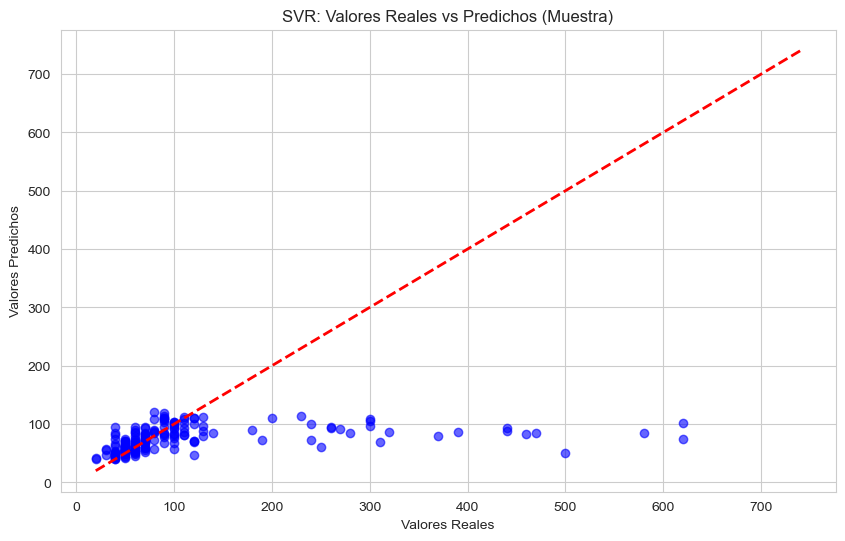

                      Modelo        MAE           MSE       RMSE       R^2
0  Support Vector Regression  44.746752  10361.698715  101.79243  0.028215

Desempeño en el conjunto de entrenamiento:
MAE: 39.25
MSE: 9221.00
RMSE: 96.03
R^2: 0.05

Desempeño en el conjunto de prueba:
MAE: 44.75
MSE: 10361.70
RMSE: 101.79
R^2: 0.03

Diferencia en R^2 (Entrenamiento - Prueba): 0.02
Posible bias (subajuste) detectado.


In [7]:
def evaluar_modelo(y_real, y_predicho):
    mae = mean_absolute_error(y_real, y_predicho)
    mse = mean_squared_error(y_real, y_predicho)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_predicho)
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")
    return mae, mse, rmse, r2

print("\nDesempeño de SVR:")
evaluar_modelo(y_test, svr_pred)

sample_indices = np.random.choice(len(y_test), size=200, replace=False)  # Limitar a 200 puntos
y_test_sample = np.array(y_test)[sample_indices]
svr_pred_sample = svr_pred[sample_indices]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, svr_pred_sample, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('SVR: Valores Reales vs Predichos (Muestra)')
plt.show()

resultados_svr = {
    "Modelo": ["Support Vector Regression"],
    "MAE": [mean_absolute_error(y_test, svr_pred)],
    "MSE": [mean_squared_error(y_test, svr_pred)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, svr_pred))],
    "R^2": [r2_score(y_test, svr_pred)]
}

resultados_df_svr = pd.DataFrame(resultados_svr)
print(resultados_df_svr)

train_pred = grid_svr.predict(X_train)
test_pred = grid_svr.predict(X_test)

print("\nDesempeño en el conjunto de entrenamiento:")
evaluar_modelo(y_train, train_pred)

print("\nDesempeño en el conjunto de prueba:")
evaluar_modelo(y_test, test_pred)

r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)
print(f"\nDiferencia en R^2 (Entrenamiento - Prueba): {r2_train - r2_test:.2f}")

if r2_train > 0.8 and (r2_train - r2_test) > 0.1:
    print("Posible overfitting detectado.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("Posible bias (subajuste) detectado.")
else:
    print("El modelo parece balanceado entre bias y varianza.")
